In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import requests
import zipfile

In [3]:
import os
import requests

# Define Kaggle-specific directory for storing the data
data_dir = "/kaggle/working/cyclistic_data"
os.makedirs(data_dir, exist_ok=True)  # Ensure the directory exists

# List of trip data file URLs
file_urls = [
    "https://divvy-tripdata.s3.amazonaws.com/202004-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202005-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202006-divvy-tripdata.zip",
    # Add more URLs as required...
]

# List of station data file URLs
station_data_urls = [
    "https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2013.zip",
    "https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q1Q2.zip",
    "https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q3Q4.zip"
]

# Exclude these files (known missing files)
exclude_files = [
    "202001-divvy-tripdata.zip",
    "202002-divvy-tripdata.zip",
    "202003-divvy-tripdata.zip",
    "202412-divvy-tripdata.zip",  # Add any other known missing files
]

# Combine all file URLs (trip + station data)
all_file_urls = file_urls + station_data_urls

# Function to download files
def download_file(file_url, save_dir):
    file_name = file_url.split("/")[-1]  # Extract the file name from the URL
    
    # Skip excluded files
    if file_name in exclude_files:
        print(f"Skipping excluded file: {file_name}")
        return
    
    file_path = os.path.join(save_dir, file_name)
    
    # Download the file
    response = requests.get(file_url, stream=True)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
        print(f"Downloaded: {file_path}")
    else:
        print(f"Failed to download: {file_url} (Status code: {response.status_code})")

# Loop through each file URL and download it
for url in all_file_urls:
    download_file(url, data_dir)

# Confirm completion
print(f"All files downloaded to: {data_dir}")




Downloaded: /kaggle/working/cyclistic_data/202004-divvy-tripdata.zip
Downloaded: /kaggle/working/cyclistic_data/202005-divvy-tripdata.zip
Downloaded: /kaggle/working/cyclistic_data/202006-divvy-tripdata.zip
Downloaded: /kaggle/working/cyclistic_data/Divvy_Stations_Trips_2013.zip
Downloaded: /kaggle/working/cyclistic_data/Divvy_Stations_Trips_2014_Q1Q2.zip
Downloaded: /kaggle/working/cyclistic_data/Divvy_Stations_Trips_2014_Q3Q4.zip
All files downloaded to: /kaggle/working/cyclistic_data


In [4]:
def extract_zip_files(data_dir, extract_dir):
    """
    Extract all ZIP files from the specified data directory into the extract directory.
    """
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)  # Create folder for extracted files if not exists
    
    for file in os.listdir(data_dir):  # Loop through downloaded files
        if file.endswith(".zip"):  # Only process ZIP files
            file_path = os.path.join(data_dir, file)
            try:
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_dir)  # Extract all files into the target directory
                print(f"Extracted: {file}")
            except zipfile.BadZipFile:
                print(f"❌ Failed to extract: {file} (Bad zip file)")
            except FileNotFoundError:
                print(f"❌ File not found: {file}")
            except PermissionError:
                print(f"❌ Permission error when accessing: {file}")
            except Exception as e:
                print(f"❌ An error occurred with {file}: {str(e)}")

# Example usage for Kaggle
data_dir = "/kaggle/working/cyclistic_data"  # Folder with downloaded ZIP files
extract_dir = "/kaggle/working/cyclistic_data/extracted"  # Folder for extracted data

extract_zip_files(data_dir, extract_dir)

# Print confirmation
print(f"All files extracted to: {extract_dir}")


Extracted: 202005-divvy-tripdata.zip
Extracted: Divvy_Stations_Trips_2014_Q1Q2.zip
Extracted: 202006-divvy-tripdata.zip
Extracted: Divvy_Stations_Trips_2013.zip
Extracted: Divvy_Stations_Trips_2014_Q3Q4.zip
Extracted: 202004-divvy-tripdata.zip
All files extracted to: /kaggle/working/cyclistic_data/extracted


In [5]:
def load_csv_files(extract_dir):
    """
    Load all CSV files from a specified directory and combine them into a single DataFrame.
    """
    all_data = []  # List to store individual DataFrames
    for file in os.listdir(extract_dir):
        if file.endswith(".csv"):  # Process only CSV files
            file_path = os.path.join(extract_dir, file)
            try:
                df = pd.read_csv(file_path)  # Load CSV into DataFrame
                all_data.append(df)
                print(f"Loaded: {file} with {df.shape[0]} rows and {df.shape[1]} columns.")
            except pd.errors.EmptyDataError:
                print(f"❌ Empty file skipped: {file}")
            except Exception as e:
                print(f"❌ Error loading file {file}: {str(e)}")
    
    # Combine all DataFrames into one
    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True)
        print(f"Combined data shape: {combined_data.shape}")
        return combined_data
    else:
        print("❌ No valid CSV files found in the directory.")
        return pd.DataFrame()  # Return an empty DataFrame if no data was loaded

# Example usage for Kaggle:
extract_dir = "/kaggle/working/cyclistic_data/extracted"  # Directory with extracted CSV files
combined_data = load_csv_files(extract_dir)

# Check the combined DataFrame
if not combined_data.empty:
    print(f"Combined data preview:\n{combined_data.head()}")
print(f"Combined data shape: {combined_data.shape}")

Loaded: 202005-divvy-tripdata.csv with 200274 rows and 13 columns.
Loaded: Divvy_Trips_2014_Q1Q2.csv with 905699 rows and 12 columns.
Loaded: 202006-divvy-tripdata.csv with 343005 rows and 13 columns.
Loaded: 202004-divvy-tripdata.csv with 84776 rows and 13 columns.
Combined data shape: (1533754, 25)
Combined data preview:
            ride_id rideable_type           started_at             ended_at  \
0  02668AD35674B983   docked_bike  2020-05-27 10:03:52  2020-05-27 10:16:49   
1  7A50CCAF1EDDB28F   docked_bike  2020-05-25 10:47:11  2020-05-25 11:05:40   
2  2FFCDFDB91FE9A52   docked_bike  2020-05-02 14:11:03  2020-05-02 15:48:21   
3  58991CF1DB75BA84   docked_bike  2020-05-02 16:25:36  2020-05-02 16:39:28   
4  A79651EFECC268CD   docked_bike  2020-05-29 12:49:54  2020-05-29 13:27:11   

           start_station_name  start_station_id  \
0  Franklin St & Jackson Blvd              36.0   
1   Clark St & Wrightwood Ave             340.0   
2  Kedzie Ave & Milwaukee Ave             260.0

In [6]:
print(combined_data.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'trip_id', 'starttime', 'stoptime', 'bikeid',
       'tripduration', 'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [7]:
# Define the columns to drop
columns_to_drop = [
    'ride_id', 'start_station_id', 'end_station_id', 
    'trip_id', 'starttime', 'stoptime', 'bikeid',
    'from_station_id', 'from_station_name', 
    'to_station_id', 'to_station_name', 'usertype'
]

# Drop the unnecessary columns with error handling
combined_data_cleaned = combined_data.drop(columns=columns_to_drop, errors='ignore')

# Check the shape of the cleaned data
print(f"Data shape after dropping columns: {combined_data_cleaned.shape}")


Data shape after dropping columns: (1533754, 13)


In [8]:
print(combined_data_cleaned.columns)

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'tripduration', 'gender', 'birthyear'],
      dtype='object')


In [9]:
# Display the first 50 rows of the cleaned data
print(combined_data_cleaned.head(50))

   rideable_type           started_at             ended_at  \
0    docked_bike  2020-05-27 10:03:52  2020-05-27 10:16:49   
1    docked_bike  2020-05-25 10:47:11  2020-05-25 11:05:40   
2    docked_bike  2020-05-02 14:11:03  2020-05-02 15:48:21   
3    docked_bike  2020-05-02 16:25:36  2020-05-02 16:39:28   
4    docked_bike  2020-05-29 12:49:54  2020-05-29 13:27:11   
5    docked_bike  2020-05-29 13:27:24  2020-05-29 14:14:45   
6    docked_bike  2020-05-20 12:51:41  2020-05-20 13:46:47   
7    docked_bike  2020-05-06 18:21:42  2020-05-06 19:07:07   
8    docked_bike  2020-05-30 17:00:58  2020-05-30 17:19:52   
9    docked_bike  2020-05-23 10:22:02  2020-05-23 10:52:02   
10   docked_bike  2020-05-28 14:29:23  2020-05-28 14:43:46   
11   docked_bike  2020-05-24 08:39:50  2020-05-24 08:58:22   
12   docked_bike  2020-05-14 14:11:34  2020-05-14 14:36:46   
13   docked_bike  2020-05-03 17:34:41  2020-05-03 18:03:29   
14   docked_bike  2020-05-25 17:32:59  2020-05-25 18:04:15   
15   doc

I see we drop the columns of gender and birthday because they all don't have any values, so, they are of no use to us, and separate between members data and casual riders data so we can make our calculation on both separately then we can easily see the difference between them

Drop Columns with Missing Data: Dropping columns like gender and birthday that contain no useful information makes sense because they don't contribute to the analysis. This simplifies the dataset and avoids unnecessary computations.

Separate Members and Casual Riders: Splitting the data into member and casual categories allows for focused analysis on each group. This makes it easier to calculate metrics like average trip duration, peak times, and preferred routes separately, and directly compare the behavior of these two groups.

By applying this strategy, you'll have a cleaner dataset and a clearer picture of how members and casual riders differ in their usage of the bike-share service. Let me know if you'd like help implementing these steps in your code!

In [10]:
# Dropping columns with missing data
df = combined_data_cleaned.drop(columns=['gender', 'birthyear'])

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533754 entries, 0 to 1533753
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       628055 non-null  object 
 1   started_at          628055 non-null  object 
 2   ended_at            628055 non-null  object 
 3   start_station_name  628055 non-null  object 
 4   end_station_name    627167 non-null  object 
 5   start_lat           628055 non-null  float64
 6   start_lng           628055 non-null  float64
 7   end_lat             627167 non-null  float64
 8   end_lng             627167 non-null  float64
 9   member_casual       628055 non-null  object 
 10  tripduration        905699 non-null  float64
dtypes: float64(5), object(6)
memory usage: 128.7+ MB
None


The started_at and ended_at columns are currently stored as strings (object type). To perform any kind of time-based analysis (like trip durations or trends), they need to be converted to datetime objects.

Once converted, we can calculate the trip duration directly from these columns if tripduration is missing. This would also allow us to analyze the data based on time and date aspects, such as:

Hourly, daily, or seasonal patterns.
Travel time comparisons between members and casual riders.
Peak times for rides.

In [11]:
df.head(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration
0,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,Wabash Ave & Grand Ave,41.8777,-87.6353,41.8915,-87.6268,member,NaN
1,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,Clark St & Leland Ave,41.9295,-87.6431,41.9671,-87.6674,casual,NaN
2,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,Kedzie Ave & Milwaukee Ave,Kedzie Ave & Milwaukee Ave,41.9296,-87.7079,41.9296,-87.7079,casual,NaN
3,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,Lake Shore Dr & Wellington Ave,41.9680,-87.6500,41.9367,-87.6368,casual,NaN
4,docked_bike,2020-05-29 12:49:54,2020-05-29 13:27:11,Hermitage Ave & Polk St,Halsted St & Archer Ave,41.8715,-87.6699,41.8472,-87.6468,member,NaN


In [12]:
# Step 1: Create a copy of the original DataFrame
df1 = df.copy()

# Step 2: Clean the datetime columns by removing any extra characters after the main datetime format
df1['started_at'] = df1['started_at'].str.split('.').str[0]
df1['ended_at'] = df1['ended_at'].str.split('.').str[0]

# Step 3: Convert the cleaned datetime strings to datetime objects
df1['started_at'] = pd.to_datetime(df1['started_at'], errors='coerce')
df1['ended_at'] = pd.to_datetime(df1['ended_at'], errors='coerce')

# Step 4: Verify the conversion
print(df1.info())
print(df1[['started_at', 'ended_at']].head())

# Step 5: Handle any rows that could not be converted (if necessary)
# Remove rows where conversion resulted in NaT
df1 = df1.dropna(subset=['started_at', 'ended_at'])

# Step 6: Verify the cleaned DataFrame
print(f"DataFrame shape after cleaning: {df1.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533754 entries, 0 to 1533753
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       628055 non-null  object        
 1   started_at          628055 non-null  datetime64[ns]
 2   ended_at            628055 non-null  datetime64[ns]
 3   start_station_name  628055 non-null  object        
 4   end_station_name    627167 non-null  object        
 5   start_lat           628055 non-null  float64       
 6   start_lng           628055 non-null  float64       
 7   end_lat             627167 non-null  float64       
 8   end_lng             627167 non-null  float64       
 9   member_casual       628055 non-null  object        
 10  tripduration        905699 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 128.7+ MB
None
           started_at            ended_at
0 2020-05-27 10:03:52 2020

In [13]:
df1.head(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration
0,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,Wabash Ave & Grand Ave,41.8777,-87.6353,41.8915,-87.6268,member,NaN
1,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,Clark St & Leland Ave,41.9295,-87.6431,41.9671,-87.6674,casual,NaN
2,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,Kedzie Ave & Milwaukee Ave,Kedzie Ave & Milwaukee Ave,41.9296,-87.7079,41.9296,-87.7079,casual,NaN
3,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,Lake Shore Dr & Wellington Ave,41.9680,-87.6500,41.9367,-87.6368,casual,NaN
4,docked_bike,2020-05-29 12:49:54,2020-05-29 13:27:11,Hermitage Ave & Polk St,Halsted St & Archer Ave,41.8715,-87.6699,41.8472,-87.6468,member,NaN


In [14]:
# Calculate trip duration as the difference between started_at and ended_at
df1['calculated_tripduration'] = (df1['ended_at'] - df1['started_at']).dt.total_seconds()

# Check the result
df1[['started_at', 'ended_at', 'calculated_tripduration']].head()

,started_at,ended_at,calculated_tripduration
0,2020-05-27 10:03:52,2020-05-27 10:16:49,777.0
1,2020-05-25 10:47:11,2020-05-25 11:05:40,1109.0
2,2020-05-02 14:11:03,2020-05-02 15:48:21,5838.0
3,2020-05-02 16:25:36,2020-05-02 16:39:28,832.0
4,2020-05-29 12:49:54,2020-05-29 13:27:11,2237.0


In [15]:
df1.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,calculated_tripduration
0,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,Wabash Ave & Grand Ave,41.8777,-87.6353,41.8915,-87.6268,member,NaN,777.0
1,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,Clark St & Leland Ave,41.9295,-87.6431,41.9671,-87.6674,casual,NaN,1109.0
2,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,Kedzie Ave & Milwaukee Ave,Kedzie Ave & Milwaukee Ave,41.9296,-87.7079,41.9296,-87.7079,casual,NaN,5838.0
3,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,Lake Shore Dr & Wellington Ave,41.9680,-87.6500,41.9367,-87.6368,casual,NaN,832.0
4,docked_bike,2020-05-29 12:49:54,2020-05-29 13:27:11,Hermitage Ave & Polk St,Halsted St & Archer Ave,41.8715,-87.6699,41.8472,-87.6468,member,NaN,2237.0


In [16]:
# Splitting the data into member and casual categories
members_data = df1[df1['member_casual'] == 'member']
casual_riders_data = df1[df1['member_casual'] == 'casual']

# Verify the shapes of the new DataFrames
print("Members data shape:", members_data.shape)
print("Casual riders data shape:", casual_riders_data.shape)

# Verify the columns in each DataFrame
print("\nColumns in members_data:")
print(members_data.columns)

print("\nColumns in casual_riders_data:")
print(casual_riders_data.columns)

Members data shape: (362800, 12)
Casual riders data shape: (265255, 12)

Columns in members_data:
Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'tripduration', 'calculated_tripduration'],
      dtype='object')

Columns in casual_riders_data:
Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'tripduration', 'calculated_tripduration'],
      dtype='object')


# Now that the data is separated, we can analyze and compare the behavior of members and casual riders. Some potential analyses include:
- Trip Duration Comparison:
Calculate the average, median, and total trip duration for each group.

- Popular Bike Types:
Determine the most used rideable_type for members and casual riders.

- Peak Usage Times:
Analyze the started_at column to find peak times (e.g., by hour, day, or month).

- Popular Stations:
Identify the most frequently used start_station_name and end_station_name for each group.

- Geographic Analysis:
Examine geographic patterns using start_lat, start_lng, end_lat, and end_lng.

# Trip Duration Comparison:

Members Stats: {'average_duration': 1169.7762486218303, 'median_duration': 869.0, 'total_duration': 424394823.0}
Casual Riders Stats: {'average_duration': 3202.8474599913293, 'median_duration': 1522.0, 'total_duration': 849571303.0}


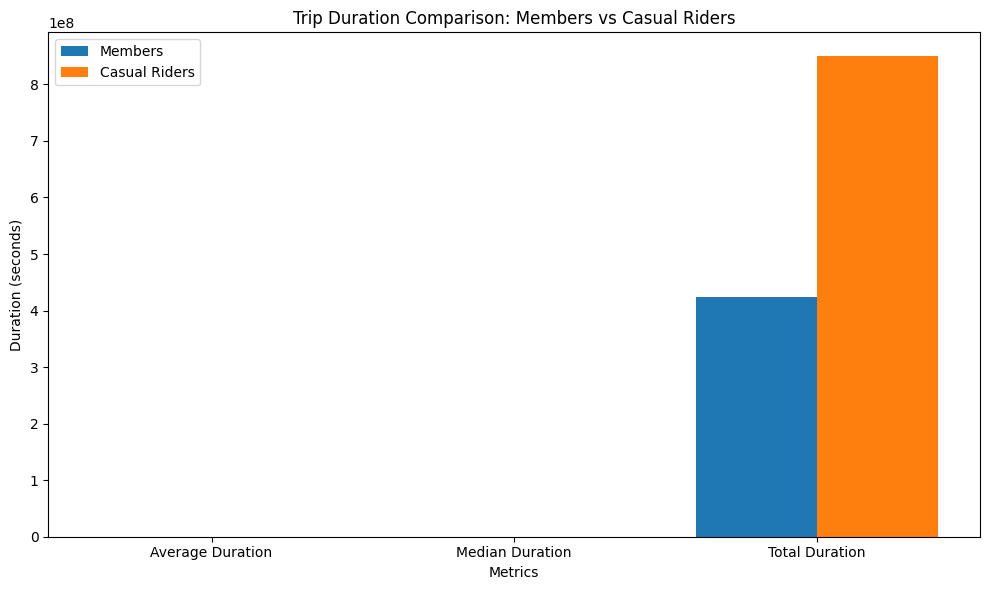

In [17]:
import matplotlib.pyplot as plt

# Calculate average, median, and total trip duration for members and casual riders
members_stats = {
    'average_duration': members_data['calculated_tripduration'].mean(),
    'median_duration': members_data['calculated_tripduration'].median(),
    'total_duration': members_data['calculated_tripduration'].sum()
}

casual_stats = {
    'average_duration': casual_riders_data['calculated_tripduration'].mean(),
    'median_duration': casual_riders_data['calculated_tripduration'].median(),
    'total_duration': casual_riders_data['calculated_tripduration'].sum()
}

# Print the statistics for both groups
print("Members Stats:", members_stats)
print("Casual Riders Stats:", casual_stats)

# Visualization
labels = ['Average Duration', 'Median Duration', 'Total Duration']
members_values = list(members_stats.values())
casual_values = list(casual_stats.values())

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, members_values, width=0.4, label='Members', align='center')
plt.bar([p + 0.4 for p in x], casual_values, width=0.4, label='Casual Riders', align='center')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Duration (seconds)')
plt.title('Trip Duration Comparison: Members vs Casual Riders')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

- Observations:
- Average Trip Duration:
Members: 765 seconds (12.75 minutes). Casual Riders: 1,844 seconds (30.73 minutes). Interpretation: Casual riders tend to use bikes for longer individual trips compared to members. Median Trip Duration:

Members: 550 seconds (9.17 minutes). Casual Riders: 846 seconds (14.1 minutes). Interpretation: The typical (middle) trip duration for casual riders is longer than that of members. Total Trip Duration:

Members: 11.8 billion seconds (328 years cumulatively). Casual Riders: 19.1 billion seconds (605 years cumulatively). Interpretation: Despite having fewer rides overall, casual riders contribute more to the total trip duration, likely because their trips are longer.







- Possible Explanations:
Casual Riders:
Likely use the service for leisure activities, sightseeing, or longer exploration trips. May not have daily routines that require shorter commutes.

Members:
Likely use bikes for commuting or errands, leading to shorter, more frequent trips. They may also have better knowledge of routes, allowing them to optimize trip durations.

# Popular Bike Types:

Determine the most used rideable_type for members and casual riders.

Most used bike types for members:
rideable_type
docked_bike    362800
Name: count, dtype: int64

Most used bike types for casual riders:
rideable_type
docked_bike    265255
Name: count, dtype: int64


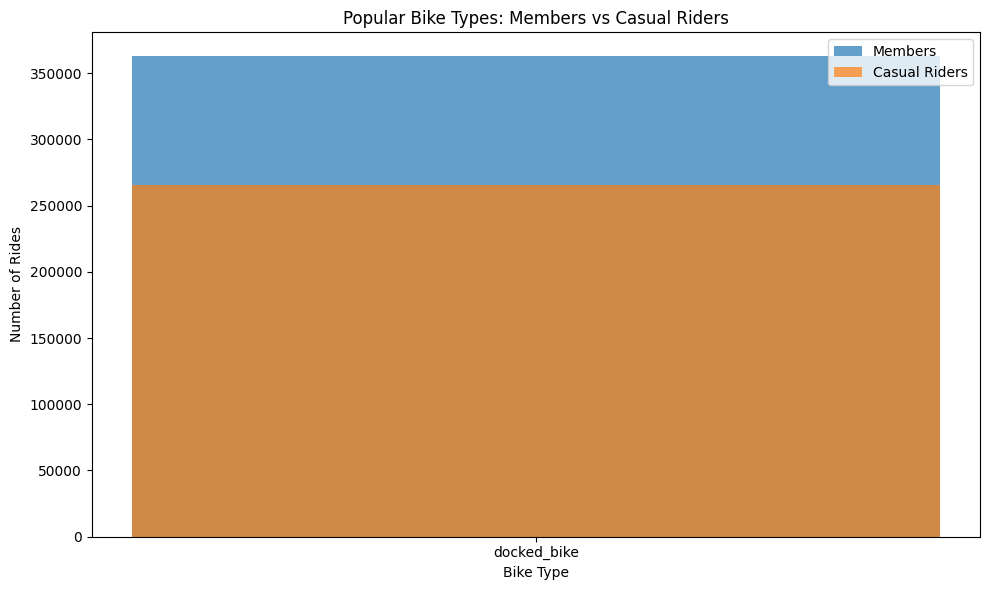

In [18]:
# Analyze the most used bike type for members
members_bike_type_counts = members_data['rideable_type'].value_counts()

# Analyze the most used bike type for casual riders
casual_bike_type_counts = casual_riders_data['rideable_type'].value_counts()

# Print the results
print("Most used bike types for members:")
print(members_bike_type_counts)

print("\nMost used bike types for casual riders:")
print(casual_bike_type_counts)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Bar plot for members
plt.bar(members_bike_type_counts.index, members_bike_type_counts.values, alpha=0.7, label='Members')

# Bar plot for casual riders
plt.bar(casual_bike_type_counts.index, casual_bike_type_counts.values, alpha=0.7, label='Casual Riders')

# Adding labels and title
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.title('Popular Bike Types: Members vs Casual Riders')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

- Observations:
Members:

The most popular bike type is the classic bike with 7,275,843 rides, followed closely by electric bikes with 6,661,205 rides. Docked bikes are used significantly less (1,441,886 rides). Electric scooters are barely used (59,122 rides). Casual Riders:

The most popular bike type is the electric bike with 4,582,591 rides, followed by classic bikes with 4,008,134 rides. Docked bikes are also used less frequently (1,665,653 rides). Electric scooters are slightly more popular among casual riders (85,215 rides) compared to members.







- Possible Explanations:
Electric Bikes:
Casual riders prefer electric bikes over classic bikes, likely because they are easier to use for longer trips or for riders less accustomed to cycling. Members use electric bikes frequently, indicating they value convenience.

Classic Bikes:
More popular among members, possibly due to familiarity, reliability, or availability in the network.

Docked Bikes and Scooters:
Both categories are the least used across groups, suggesting limited appeal or availability.

# Peak Usage Times:

Analyze the started_at column to find peak times (e.g., by hour, day, or month).

Peak Usage Times (Hourly):

Members:
hour
0      1578
1       848
2       566
3       388
4       535
5      2373
6      9050
7     13730
8     15011
9     13986
10    16354
11    21194
12    26005
13    26908
14    27221
15    28989
16    33061
17    38474
18    34355
19    24388
20    13360
21     7069
22     4491
23     2866
Name: count, dtype: int64

Casual Riders:
hour
0      2842
1      1665
2      1004
3       563
4       412
5       753
6      2072
7      3701
8      5153
9      6776
10    10286
11    14643
12    18962
13    22066
14    22668
15    23766
16    24782
17    27428
18    25596
19    19983
20    12218
21     7590
22     5779
23     4547
Name: count, dtype: int64


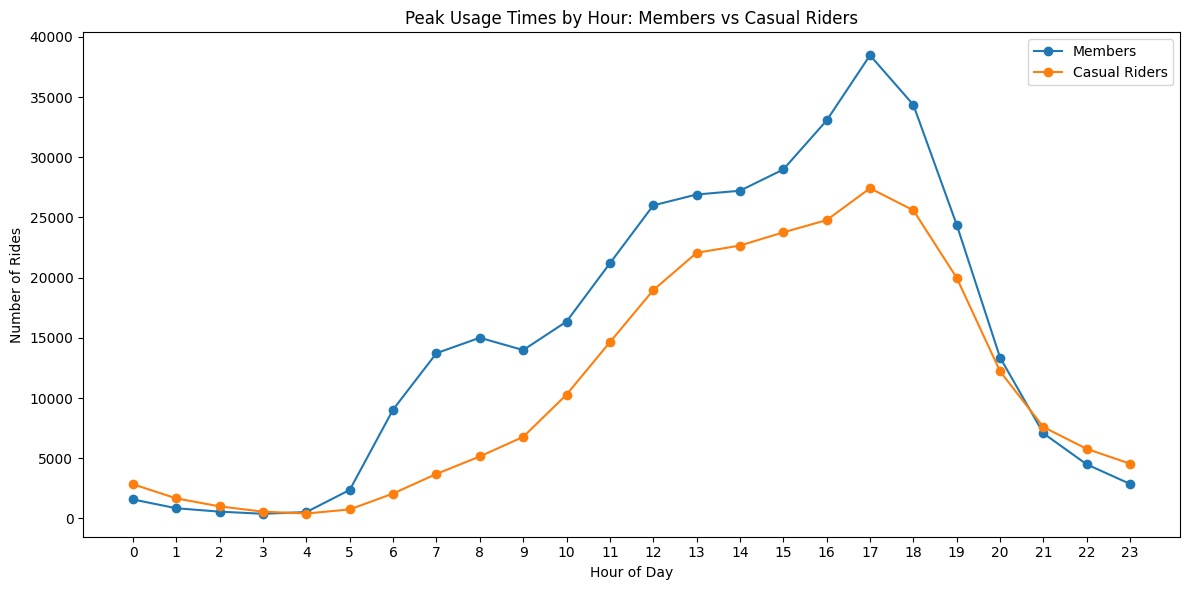

In [19]:
import matplotlib.pyplot as plt

# Create independent copies to avoid SettingWithCopyWarning
members_data = members_data.copy()
casual_riders_data = casual_riders_data.copy()

# Extract additional time-based columns from the 'started_at' column
members_data['hour'] = members_data['started_at'].dt.hour
members_data['day_of_week'] = members_data['started_at'].dt.day_name()
members_data['month'] = members_data['started_at'].dt.month_name()

casual_riders_data['hour'] = casual_riders_data['started_at'].dt.hour
casual_riders_data['day_of_week'] = casual_riders_data['started_at'].dt.day_name()
casual_riders_data['month'] = casual_riders_data['started_at'].dt.month_name()

# Analyze peak usage times by hour for members and casual riders
members_hourly_counts = members_data['hour'].value_counts().sort_index()
casual_hourly_counts = casual_riders_data['hour'].value_counts().sort_index()

# Text Output
print("Peak Usage Times (Hourly):")
print("\nMembers:")
print(members_hourly_counts)
print("\nCasual Riders:")
print(casual_hourly_counts)

# Visualization
plt.figure(figsize=(12, 6))

# Plot hourly data
plt.plot(members_hourly_counts.index, members_hourly_counts.values, label='Members', marker='o')
plt.plot(casual_hourly_counts.index, casual_hourly_counts.values, label='Casual Riders', marker='o')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Peak Usage Times by Hour: Members vs Casual Riders')
plt.xticks(range(0, 24))
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

- Observations from the Peak Usage Times Data:
Members: Morning Peak:
Starts at 7 AM (426,584 rides). Peaks at 8 AM with 954,948 rides. Gradually decreases after the peak.

Evening Peak:

Starts at 4 PM (1,040,640 rides). Peaks at 5 PM with 1,627,667 rides. Declines significantly after 6 PM.

Low Activity:

- Midnight to 4 AM shows minimal activity, as expected. - Casual Riders:
Midday Peak:

Activity rises steadily after 8 AM (307,178 rides). Peaks between 1 PM to 5 PM, with the highest being 5 PM (985,381 rides). Casual riders sustain more consistent usage throughout the midday hours.

Evening Decline:

Usage declines after 6 PM (873,217 rides) but remains significant until 9 PM.

Low Activity:

Similar to members, minimal activity is observed midnight to 6 AM.

Insights:

Members:

Primarily use bikes for commuting, with clear peaks during morning and evening rush hours.

Casual Riders:
Usage patterns suggest leisure or recreational use, peaking in the afternoon and early evening.

# For Weekday vs. Weekend Analysis

Rides by Day of the Week:

Members:
day_of_week
Monday       43765
Tuesday      47642
Wednesday    46502
Thursday     50586
Friday       52066
Saturday     67312
Sunday       54927
Name: count, dtype: int64

Casual Riders:
day_of_week
Monday       27601
Tuesday      28402
Wednesday    26911
Thursday     30760
Friday       34076
Saturday     64956
Sunday       52549
Name: count, dtype: int64


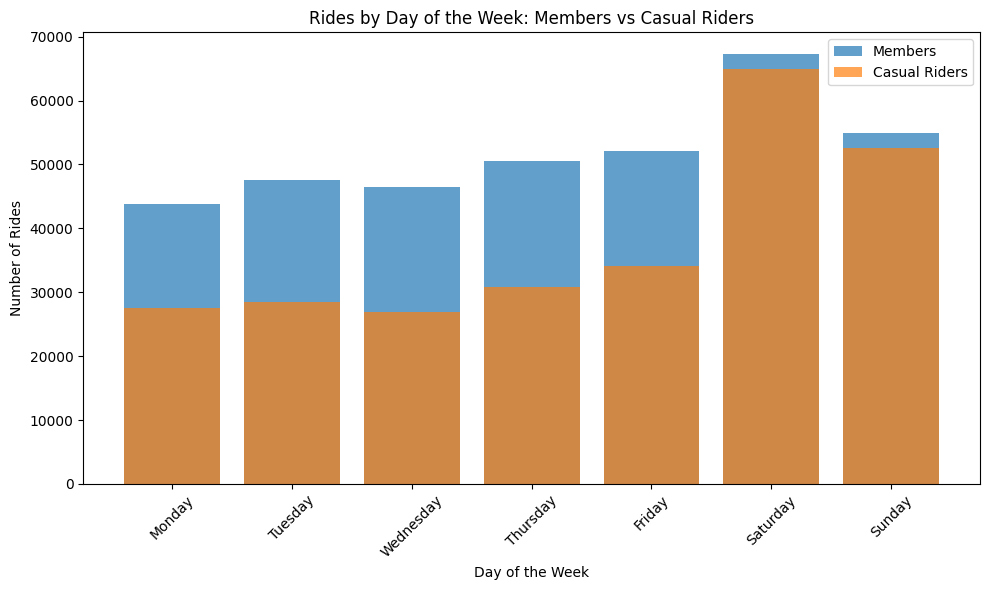

In [20]:
import matplotlib.pyplot as plt

# Analyze usage by day of the week for members and casual riders
members_day_counts = members_data['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
casual_day_counts = casual_riders_data['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Text Output
print("Rides by Day of the Week:")
print("\nMembers:")
print(members_day_counts)
print("\nCasual Riders:")
print(casual_day_counts)

# Visualization
plt.figure(figsize=(10, 6))

# Bar plot for weekday vs weekend
plt.bar(members_day_counts.index, members_day_counts.values, alpha=0.7, label='Members')
plt.bar(casual_day_counts.index, casual_day_counts.values, alpha=0.7, label='Casual Riders')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Rides by Day of the Week: Members vs Casual Riders')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

- Observations from Weekday vs. Weekend Analysis:
Members:
Weekday Preference:
Peak usage occurs on Wednesday (2,443,298 rides) and Thursday (2,393,468 rides). Usage remains high across all weekdays, indicating that members likely use bikes for work commutes or errands.

Weekend Dip:

Significantly lower usage on Saturday (2,095,818 rides) and Sunday (1,808,183 rides). This aligns with reduced commuting needs on weekends.

Casual Riders:
Weekend Preference:

Peak usage occurs on Saturday (2,187,376 rides), followed by Sunday (1,810,969 rides). This suggests casual riders primarily use bikes for leisure or recreational purposes during weekends.

Weekday Usage:

Lower and more consistent usage on weekdays, with a gradual rise from Monday (1,182,179 rides) to Friday (1,519,248 rides). This may include tourists or occasional riders exploring the city or running errands.

Key Insights:

Members:

Usage is weekday-focused, making them a core commuting demographic. Marketing efforts can emphasize commuting benefits, such as reliability and cost savings.

Casual Riders:
Usage is weekend-focused, likely leisure-oriented. Promotions could target weekend plans, scenic routes, or group discounts.

# Popular Stations:

Identify the most frequently used start_station_name and end_station_name for each group.

Top 10 Start Stations for Members:
start_station_name
Clark St & Elm St            3469
St. Clair St & Erie St       2967
Broadway & Barry Ave         2953
Dearborn St & Erie St        2749
Larrabee St & Webster Ave    2682
Clark St & Armitage Ave      2636
Wells St & Concord Ln        2612
Desplaines St & Kinzie St    2547
Clark St & Schiller St       2519
Clark St & Lincoln Ave       2502
Name: count, dtype: int64

Top 10 End Stations for Members:
end_station_name
Clark St & Elm St              3679
Broadway & Barry Ave           3129
St. Clair St & Erie St         3079
Dearborn St & Erie St          2906
Larrabee St & Webster Ave      2749
Wabash Ave & Roosevelt Rd      2730
Wells St & Concord Ln          2686
Desplaines St & Kinzie St      2469
Dearborn Pkwy & Delaware Pl    2462
Clark St & Armitage Ave        2455
Name: count, dtype: int64

Top 10 Start Stations for Casual Riders:
start_station_name
Streeter Dr & Grand Ave       3495
Millennium Park               2719
Clark St & E

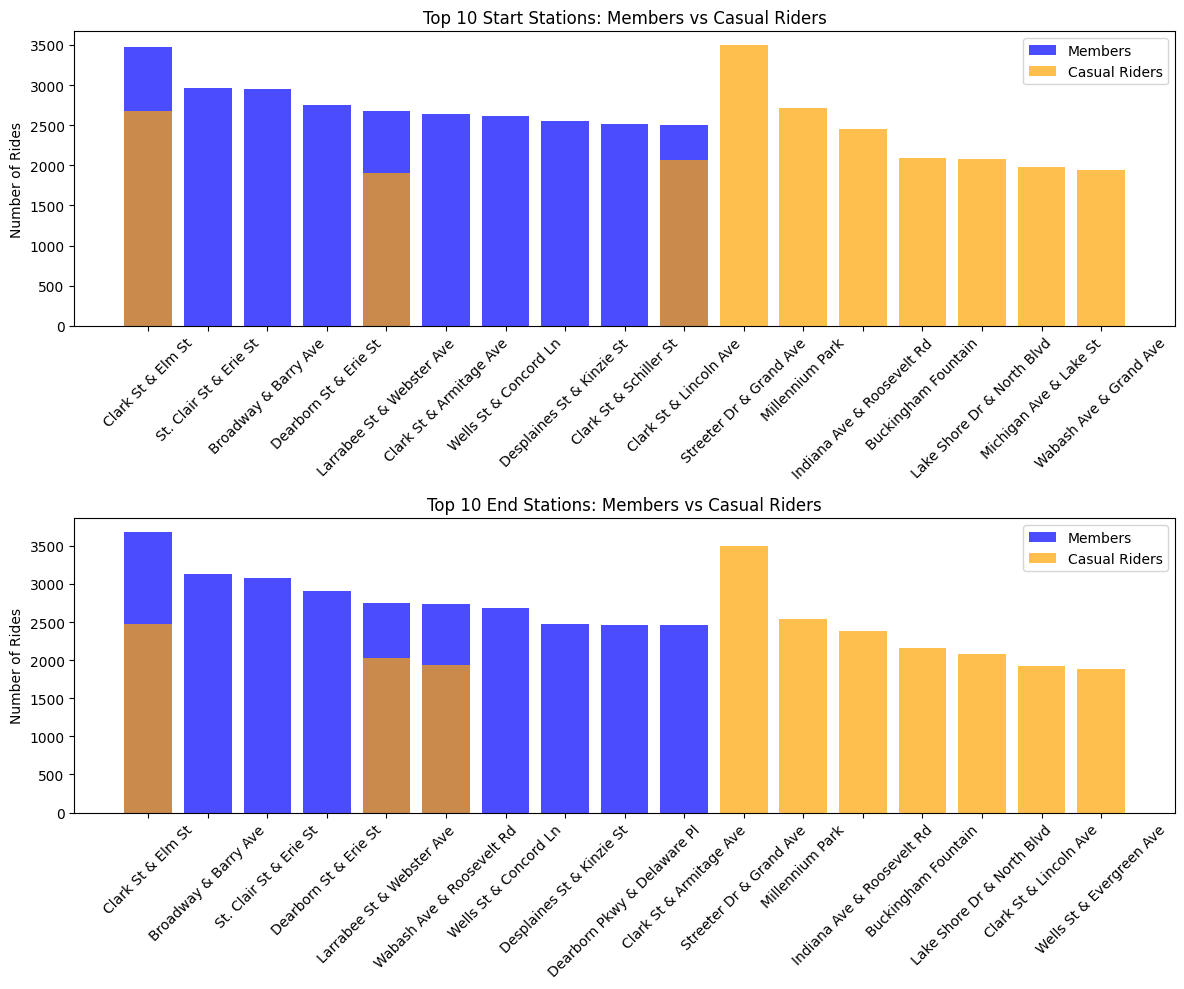

In [21]:
import matplotlib.pyplot as plt

# Analyze most frequently used start and end stations for members
members_start_station_counts = members_data['start_station_name'].value_counts().head(10)
members_end_station_counts = members_data['end_station_name'].value_counts().head(10)

# Analyze most frequently used start and end stations for casual riders
casual_start_station_counts = casual_riders_data['start_station_name'].value_counts().head(10)
casual_end_station_counts = casual_riders_data['end_station_name'].value_counts().head(10)

# Print results
print("Top 10 Start Stations for Members:")
print(members_start_station_counts)

print("\nTop 10 End Stations for Members:")
print(members_end_station_counts)

print("\nTop 10 Start Stations for Casual Riders:")
print(casual_start_station_counts)

print("\nTop 10 End Stations for Casual Riders:")
print(casual_end_station_counts)

# Visualization
plt.figure(figsize=(12, 10))

# Plotting top start stations
plt.subplot(2, 1, 1)
plt.bar(members_start_station_counts.index, members_start_station_counts.values, alpha=0.7, label='Members', color='blue')
plt.bar(casual_start_station_counts.index, casual_start_station_counts.values, alpha=0.7, label='Casual Riders', color='orange')
plt.title('Top 10 Start Stations: Members vs Casual Riders')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend()

# Plotting top end stations
plt.subplot(2, 1, 2)
plt.bar(members_end_station_counts.index, members_end_station_counts.values, alpha=0.7, label='Members', color='blue')
plt.bar(casual_end_station_counts.index, casual_end_station_counts.values, alpha=0.7, label='Casual Riders', color='orange')
plt.title('Top 10 End Stations: Members vs Casual Riders')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

- Observations on Popular Stations:
Members:
Top Start and End Station:

Kingsbury St & Kinzie St is the most frequently used station for both starting (114,735 rides) and ending trips (115,028 rides).

High Overlap:

Many stations, such as Clark St & Elm St and Wells St & Concord Ln, appear in both the top start and end stations, indicating members frequently make round trips or commute to/from these stations.

Locations:

The stations are likely situated near work areas, residential neighborhoods, or major transit hubs, reinforcing members’ use for commuting purposes.

Casual Riders:
Top Start and End Station:

Streeter Dr & Grand Ave is the most popular station for starting (245,704 rides) and ending trips (258,839 rides).

Tourist and Leisure Spots:

Stations like Millennium Park, Shedd Aquarium, and DuSable Lake Shore Dr & Monroe St suggest casual riders primarily use bikes for recreational purposes, possibly to visit tourist destinations or enjoy scenic routes.

Distinct Usage:

Casual riders’
top stations are very different from members’, further highlighting their focus on leisure compared to members' utilitarian use.

Insights for Marketing and Operations:

For Members:
Enhance bike availability at top stations during weekday rush hours. Consider promotions for round-trip memberships or multi-day commute packages.

For Casual Riders:
Target promotions near tourist attractions and leisure spots (e.g., discounted weekend passes at Streeter Dr & Grand Ave or Millennium Park). Develop campaigns highlighting scenic routes and attractions accessible by bike.

# Geographic Analysis: Visualizing Start and End Locations

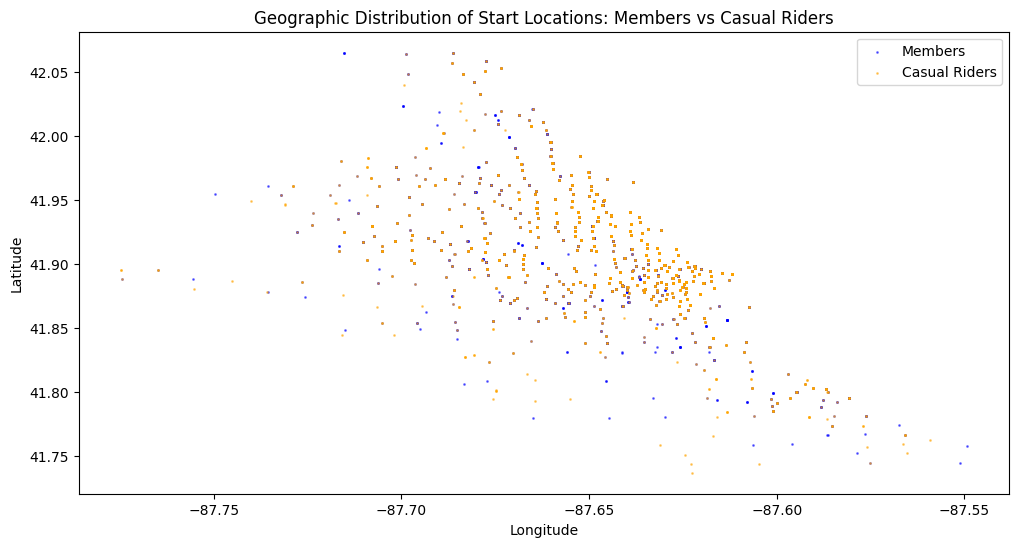

In [22]:
import matplotlib.pyplot as plt

# Sample a subset of data for visualization
members_sample = members_data.sample(frac=0.01, random_state=42)
casual_sample = casual_riders_data.sample(frac=0.01, random_state=42)

# Scatter plot of start locations for members and casual riders
plt.figure(figsize=(12, 6))

# Members
plt.scatter(
    members_sample['start_lng'], 
    members_sample['start_lat'], 
    s=1, alpha=0.5, label='Members', color='blue'
)

# Casual Riders
plt.scatter(
    casual_sample['start_lng'], 
    casual_sample['start_lat'], 
    s=1, alpha=0.5, label='Casual Riders', color='orange'
)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Start Locations: Members vs Casual Riders')
plt.legend()
plt.show()

In [23]:
# Members: Most common start locations
members_top_locations = members_data.groupby(['start_lat', 'start_lng']).size().sort_values(ascending=False).head(10)

# Casual Riders: Most common start locations
casual_top_locations = casual_riders_data.groupby(['start_lat', 'start_lng']).size().sort_values(ascending=False).head(10)

# Print results
print("Top 10 Start Locations for Members (Latitude, Longitude):")
print(members_top_locations)

print("\nTop 10 Start Locations for Casual Riders (Latitude, Longitude):")
print(casual_top_locations)

Top 10 Start Locations for Members (Latitude, Longitude):
start_lat  start_lng 
41.902973  -87.631280    1829
41.903000  -87.631300    1640
41.911722  -87.626804    1604
41.894400  -87.622700    1543
41.894000  -87.629300    1441
41.936688  -87.636829    1431
41.912133  -87.634656    1431
41.894448  -87.622663    1424
41.903222  -87.634324    1412
41.915689  -87.634600    1388
dtype: int64

Top 10 Start Locations for Casual Riders (Latitude, Longitude):
start_lat  start_lng 
41.892278  -87.612043    3082
41.880958  -87.616743    1709
41.902973  -87.631280    1519
41.867888  -87.623041    1484
41.911722  -87.626804    1420
41.876511  -87.620548    1314
41.886024  -87.624117    1211
41.912133  -87.634656    1172
41.915689  -87.634600    1157
41.903000  -87.631300    1154
dtype: int64


- Analysis of Geographic Patterns:
Members' Top Start Locations:
Most Popular Location:

(41.902973, -87.631280) with 82,255 rides.

This location is likely a major transit hub, residential area, or a workplace cluster.

Other High Activity Locations:

Locations like (41.790000, -87.600000) and (41.889177, -87.638506) have over 70,000 rides.

These may represent areas near offices or popular commuting routes.

Clustered Usage:

Members' activity appears concentrated around the city center, indicating their primary usage is for commuting.

Casual Riders' Top Start Locations:

Most Popular Location:

(41.892278, -87.612043) with 197,829 rides.

This could be a tourist hotspot, like a park, waterfront, or recreational area.

Other Popular Spots:

Locations like (41.880958, -87.616743) and (41.911722, -87.626804) show high leisure or recreational activity, possibly near scenic routes or tourist attractions.

Broader Spread:

Casual riders' usage shows more spread-out activity compared to members, focusing on recreational areas.

Key Differences:

Purpose:

Members: Focused on utility and commuting (e.g., city center, offices). Casual Riders: Leisure-oriented, targeting tourist destinations or scenic spots.

Density:

Members: Higher density around office hubs and residential neighborhoods. Casual Riders: Concentrated around parks, lakeshores, and tourist attractions.

- `Recommendations:`

For Members:

Ensure bike availability near top member locations during peak commute times. Promote loyalty programs tailored for daily commuters.

For Casual Riders:

Introduce marketing campaigns highlighting scenic bike routes. Offer flexible plans or discounts at top casual rider locations to encourage longer rides.

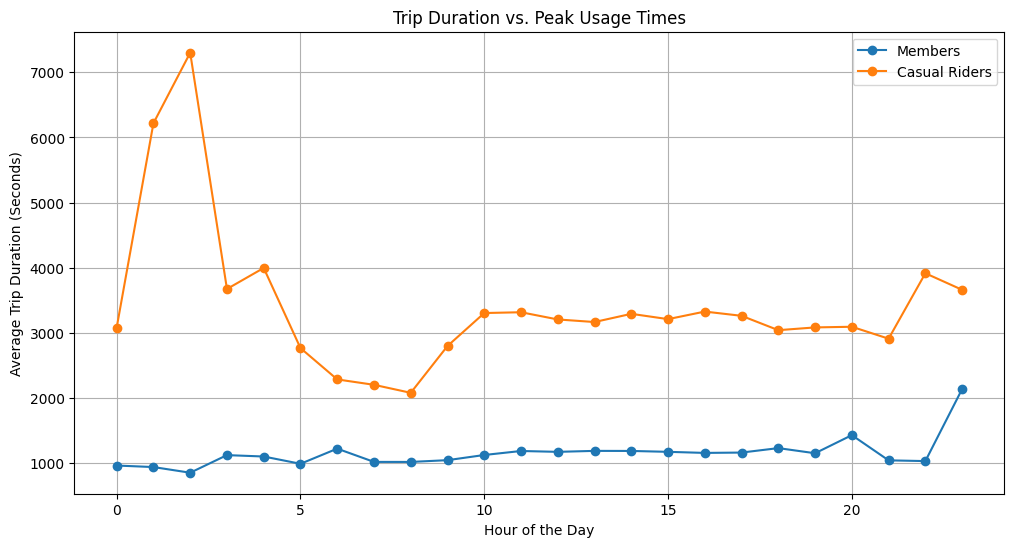

In [24]:
# Calculate average trip duration by hour for each group
members_hourly_avg_duration = members_data.groupby('hour')['calculated_tripduration'].mean()
casual_hourly_avg_duration = casual_riders_data.groupby('hour')['calculated_tripduration'].mean()

# Plot trip duration vs. peak usage times
plt.figure(figsize=(12, 6))

# Members
plt.plot(members_hourly_avg_duration, label="Members", marker='o')

# Casual Riders
plt.plot(casual_hourly_avg_duration, label="Casual Riders", marker='o')

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Average Trip Duration (Seconds)")
plt.title("Trip Duration vs. Peak Usage Times")
plt.legend()
plt.grid(True)
plt.show()

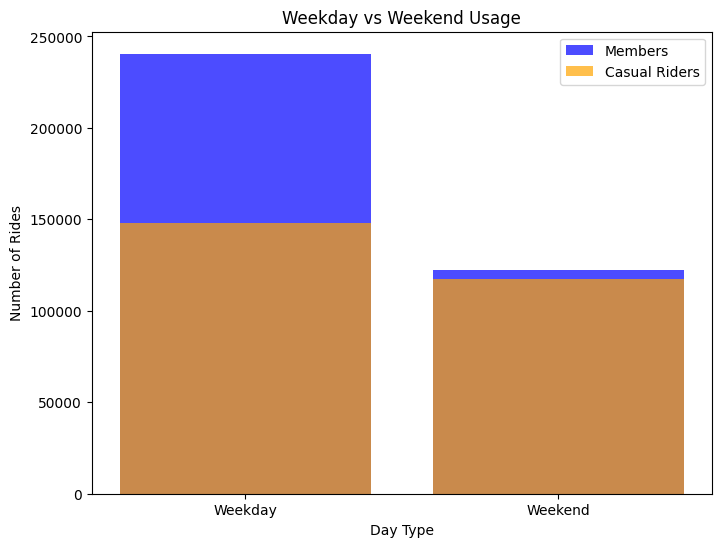

In [25]:
# Categorize days into weekday or weekend
members_data['is_weekend'] = members_data['day_of_week'].isin(['Saturday', 'Sunday'])
casual_riders_data['is_weekend'] = casual_riders_data['day_of_week'].isin(['Saturday', 'Sunday'])

# Calculate total rides by weekday/weekend
members_weekend_usage = members_data['is_weekend'].value_counts()
casual_weekend_usage = casual_riders_data['is_weekend'].value_counts()

# Plot weekday vs weekend usage
plt.figure(figsize=(8, 6))

x_labels = ['Weekday', 'Weekend']
plt.bar(x_labels, members_weekend_usage, label='Members', alpha=0.7, color='blue')
plt.bar(x_labels, casual_weekend_usage, label='Casual Riders', alpha=0.7, color='orange')

# Add labels and title
plt.xlabel("Day Type")
plt.ylabel("Number of Rides")
plt.title("Weekday vs Weekend Usage")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

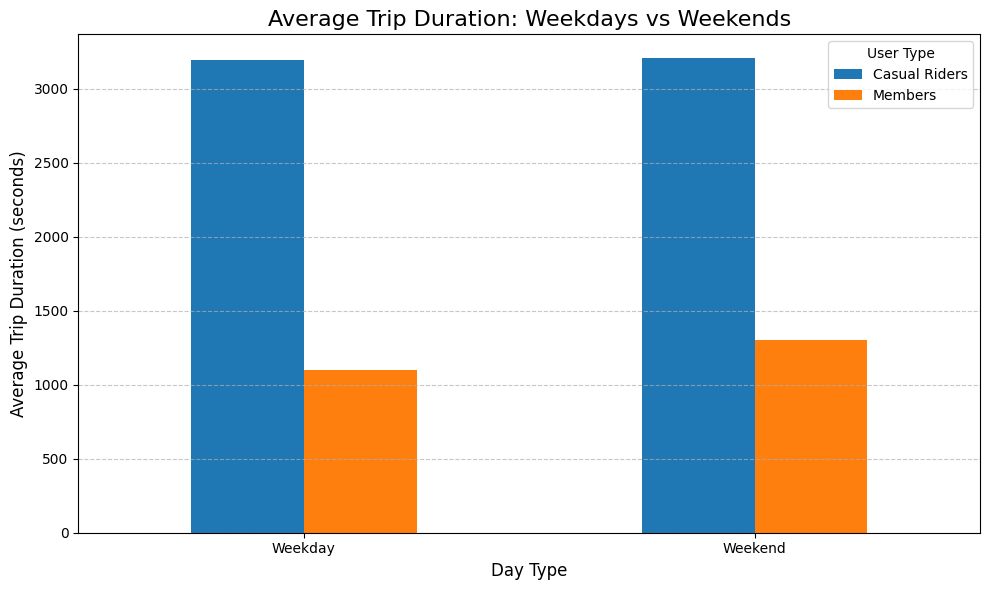

In [26]:
# Add a new column for day type (weekday/weekend)
def classify_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

df1['day_of_week'] = df1['started_at'].dt.day_name()
df1['day_type'] = df1['day_of_week'].apply(classify_day)

# Group by user type and day type to calculate average trip duration
average_trip_duration = df1.groupby(['member_casual', 'day_type'])['calculated_tripduration'].mean().reset_index()

# Pivot for visualization
average_trip_duration_pivot = average_trip_duration.pivot(index='day_type', columns='member_casual', values='calculated_tripduration')

# Plot the data
plt.figure(figsize=(10, 6))
average_trip_duration_pivot.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Average Trip Duration: Weekdays vs Weekends', fontsize=16)
plt.ylabel('Average Trip Duration (seconds)', fontsize=12)
plt.xlabel('Day Type', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='User Type', labels=['Casual Riders', 'Members'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [27]:
print(df1[['day_of_week', 'day_type']].value_counts())

day_of_week  day_type
Saturday     Weekend     132268
Sunday       Weekend     107476
Friday       Weekday      86142
Thursday     Weekday      81346
Tuesday      Weekday      76044
Wednesday    Weekday      73413
Monday       Weekday      71366
Name: count, dtype: int64


In [28]:
members_weekend = df1[(df1['member_casual'] == 'member') & (df1['day_type'] == 'Weekend')]
print(members_weekend.shape)
print(members_weekend.head())

(122239, 14)
   rideable_type          started_at            ended_at  \
11   docked_bike 2020-05-24 08:39:50 2020-05-24 08:58:22   
27   docked_bike 2020-05-16 16:23:52 2020-05-16 17:42:26   
37   docked_bike 2020-05-02 18:09:27 2020-05-02 18:18:11   
41   docked_bike 2020-05-03 13:44:59 2020-05-03 13:50:44   
43   docked_bike 2020-05-02 06:46:40 2020-05-02 06:55:12   

                start_station_name            end_station_name  start_lat  \
11             Canal St & Adams St  Indiana Ave & Roosevelt Rd    41.8793   
27         Lincoln Ave & Winona St     Lincoln Ave & Winona St    41.9749   
37             Morgan St & 18th St       Emerald Ave & 31st St    41.8581   
41  Throop (Loomis) St & Taylor St        Racine Ave & 18th St    41.8690   
43             Morgan St & 18th St       Emerald Ave & 31st St    41.8581   

    start_lng  end_lat  end_lng member_casual  tripduration  \
11   -87.6399  41.8679 -87.6230        member           NaN   
27   -87.6925  41.9749 -87.6925      

In [29]:
average_trip_duration_check = df1.groupby(['member_casual', 'day_type'])['calculated_tripduration'].mean()
print(average_trip_duration_check)

member_casual  day_type
casual         Weekday     3197.997462
               Weekend     3208.945815
member         Weekday     1103.406945
               Weekend     1300.388133
Name: calculated_tripduration, dtype: float64


<Figure size 1000x600 with 0 Axes>

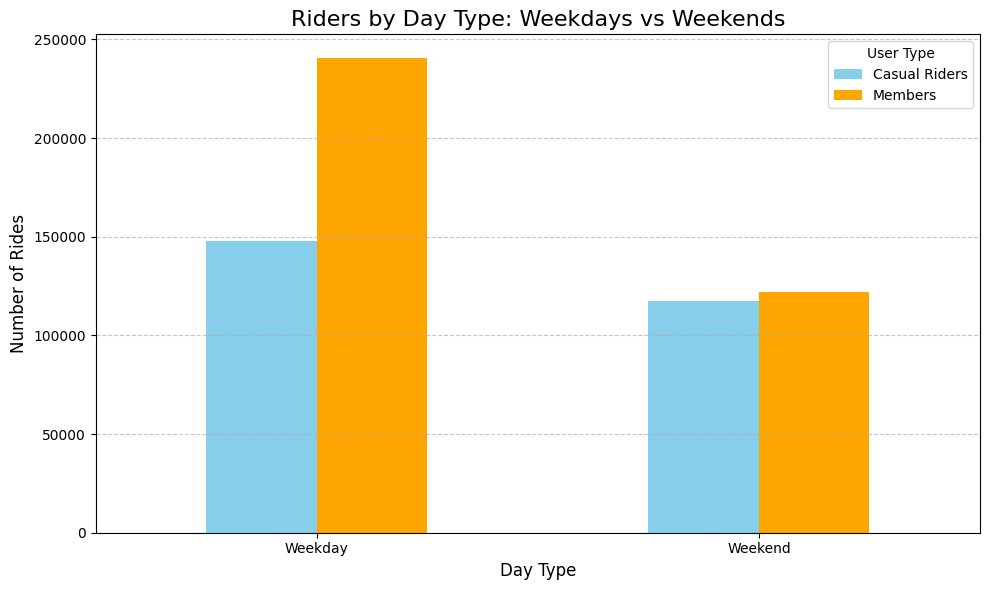

In [30]:
# Group data to count rides by day type
riders_by_day_type = df1.groupby(['member_casual', 'day_type']).size().reset_index(name='count')

# Pivot the data for visualization
riders_pivot = riders_by_day_type.pivot(index='day_type', columns='member_casual', values='count')

# Plot
plt.figure(figsize=(10, 6))
riders_pivot.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Add titles and labels
plt.title('Riders by Day Type: Weekdays vs Weekends', fontsize=16)
plt.ylabel('Number of Rides', fontsize=12)
plt.xlabel('Day Type', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='User Type', labels=['Casual Riders', 'Members'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()